In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

In [2]:
DF = pd.read_csv("data/final_data_rev/train/train_ver1_1.csv")

In [3]:
display(DF.head())
print("data shape : ", DF.shape)

,acc_id,label,guild,wk1_cnt_dt,wk1_play_time,wk1_npc_exp,wk1_npc_hongmun,wk1_quest_exp,wk1_quest_hongmun,wk1_item_hongmun,...,wk8_source_accessory,wk8_target_accessory,wk1_payment,wk2_payment,wk3_payment,wk4_payment,wk5_payment,wk6_payment,wk7_payment,wk8_payment
0,b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...,week,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1,ed500c4957956b3e99dc3985666850b582f812405eefb6...,week,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
2,acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...,week,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
3,34095a3c9a2937ced3ea3fd75e22ce177dc5879d2a53f7...,week,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.639167,0.0,0.0,17.428232,0.0,17.428232
4,26f3db6e8817a93c4ceda9a16f0832945e43d950b95882...,week,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000


data shape :  (100000, 403)


f1 train score :  0.9688556131137397
validation score :  0.7303128228818958


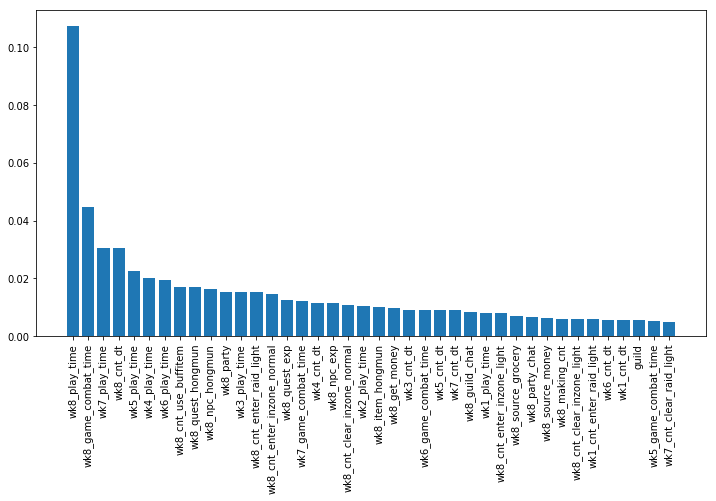

In [5]:
X = DF.drop(['acc_id', 'label'], axis = 1)
col_name = X.columns
X = X.values
y = DF['label'].values
np.random.seed(2)

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=2)
model = RandomForestClassifier(n_estimators=100,random_state = 2)
model.fit(X_train,y_train)

print("f1 train score : ", f1_score(y_train, model.predict(X_train), average = 'macro'))
print("validation score : ",  f1_score(y_val, model.predict(X_val), average = 'macro'))

sort = pd.Series(model.feature_importances_)
sort = sort.sort_values(ascending = False)

plt.figure(figsize = (12,6))
plt.bar(col_name[sort.index[0:40]], sort[0:40])
plt.xticks(rotation='vertical')
plt.show()

In [12]:
temp = pd.DataFrame(sort)
temp.index = col_name[sort.index]
temp = temp.reset_index()
temp.columns = ['feature', 'importance']
#temp.to_csv('feature_list.csv', index = False, encoding = False)

In [13]:
col_name[sort.index]

Index(['wk8_play_time', 'wk8_game_combat_time', 'wk7_play_time', 'wk8_cnt_dt',
       'wk5_play_time', 'wk4_play_time', 'wk6_play_time',
       'wk8_cnt_use_buffitem', 'wk8_quest_hongmun', 'wk8_npc_hongmun',
       ...
       'wk4_source_gem', 'wk5_source_weapon', 'wk4_target_weapon',
       'wk5_target_accessory', 'wk6_target_weapon', 'wk4_source_weapon',
       'wk3_source_gem', 'wk1_source_costume', 'wk1_target_weapon',
       'wk2_source_weapon'],
      dtype='object', length=401)

f1 train score :  0.9642143842052358
validation score :  0.7475440874139894


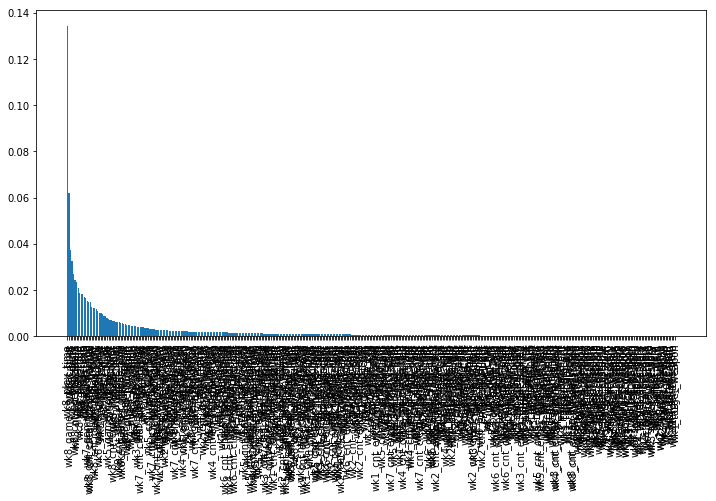

In [3]:
A = DF.loc[0:74999,:]
A = A.drop(['acc_id', 'label'], axis = 1)
col_name = A.columns
A = A.values
b = DF.loc[0:74999,'label'].values
np.random.seed(1)

A_train, A_val, b_train, b_val = train_test_split(A,b,test_size=0.2,random_state=1)
model2 = RandomForestClassifier(n_estimators=100,random_state = 1)
model2.fit(A_train,b_train)

print("f1 train score : ", f1_score(b_train, model2.predict(A_train), average = 'macro'))
print("validation score : ",  f1_score(b_val, model2.predict(A_val), average = 'macro'))

sort = pd.Series(model2.feature_importances_)
sort = sort.sort_values(ascending = False)

plt.figure(figsize = (12,6))
plt.bar(col_name[sort.index], sort)
plt.xticks(rotation='vertical')
plt.show()

In [4]:
temp = pd.DataFrame(sort)
temp.index = col_name[sort.index]
temp = temp.reset_index()
temp.columns = ['feature', 'importance']
#temp.to_csv('feature_list.csv', index = False, encoding = False)

In [7]:
col_name[sort.index]

Index(['wk8_play_time', 'wk8_game_combat_time', 'wk8_cnt_dt', 'wk7_play_time',
       'wk8_party', 'wk8_cnt_use_buffitem', 'wk8_quest_hongmun',
       'wk5_play_time', 'wk8_npc_hongmun', 'wk6_play_time',
       ...
       'wk2_source_costume', 'wk2_source_weapon', 'wk3_target_weapon',
       'wk4_target_gem', 'wk1_target_weapon', 'wk2_target_gem',
       'wk2_target_weapon', 'wk4_source_gem', 'wk1_target_costume',
       'wk4_target_weapon'],
      dtype='object', length=401)